# Ponto Fixo

O método do Ponto Fixo busca encontrar a raiz de uma função definindo uma função iterativa g(x) tal que x_{n+1} = g(x_n). O processo continua até que o erro seja menor que a tolerância

In [1]:
import sys
import os

# Obtém o caminho absoluto do diretório do notebook
notebook_dir = os.path.abspath('')

# Adiciona o diretório pai ao sys.path para reconhecer "Graph"
sys.path.append(os.path.join(notebook_dir, '..'))

import numpy as np
import sympy as sp
from tabulate import tabulate
from Graph.graph import plotar_funcao

In [2]:
def funcoes_iterativas(g, x0, tol):
    """
    Implementa o método das funções iterativas.
    
    Parâmetros:
    g -- Função iterativa g(x)
    x0 -- Aproximação inicial
    tol -- Tolerância do erro
    
    Retorna:
    raiz aproximada e tabela com as iterações
    """
    tabela = []
    erro_absoluto = None
    erro_relativo = None
    iter = 0
    
    while True:
        x1 = g(x0)
        erro_absoluto = abs(x1 - x0)
        erro_relativo = abs((x1 - x0) / x1) if x1 != 0 else float('inf')
        
        tabela.append([iter, x0, x1, erro_absoluto, erro_relativo])
        iter += 1
        
        if erro_absoluto <= tol:
            return x1, tabela
        
        x0 = x1

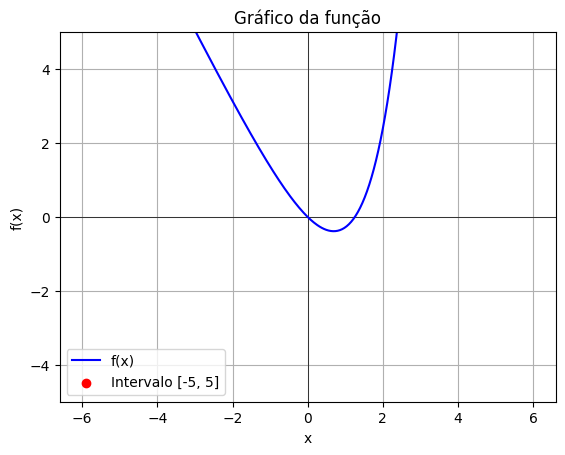

  Interação     x_n    g(x_n)    Erro Absoluto    Erro Relativo
-----------  ------  --------  ---------------  ---------------
          1  0.5000    0.6931           0.1931           0.2787
          2  0.6931    0.8697           0.1766           0.2030
          3  0.8697    1.0078           0.1380           0.1370
          4  1.0078    1.1038           0.0960           0.0870
          5  1.1038    1.1655           0.0617           0.0530
          6  1.1655    1.2033           0.0378           0.0314
          7  1.2033    1.2257           0.0224           0.0183
          8  1.2257    1.2388           0.0131           0.0106
          9  1.2388    1.2463           0.0076           0.0061
         10  1.2463    1.2507           0.0043           0.0035
         11  1.2507    1.2531           0.0025           0.0020
         12  1.2531    1.2546           0.0014           0.0011
         13  1.2546    1.2554           0.0008           0.0006
Raiz aproximada: 1.2554


In [4]:
# Entrada do usuário
x = sp.symbols('x')
f_usuario = input("Digite a função f(x): ")
g_usuario = input("Digite a função iterativa g(x) (ou pressione Enter para calcular automaticamente): ")
x0 = float(input("Digite a aproximação inicial: "))
tol = float(input("Digite o erro de tolerância: "))

# Processamento das funções
f_simbolica = sp.sympify(f_usuario)
f_lambdify = sp.lambdify(x, f_simbolica, 'numpy')

if g_usuario.strip():
    g_simbolica = sp.sympify(g_usuario)
else:
    g_simbolica = x - f_simbolica / sp.diff(f_simbolica, x)  # Função iterativa derivada automaticamente

g_lambdify = sp.lambdify(x, g_simbolica, 'numpy')

raiz, tabela = funcoes_iterativas(g_lambdify, x0, tol)

plotar_funcao(f_lambdify)

# Exibindo tabela de resultados
print(tabulate(tabela, headers=["Interação", "x_n", "g(x_n)", "Erro Absoluto", "Erro Relativo"], floatfmt=".4f"))
print(f"Raiz aproximada: {raiz:.4f}")